In [1]:
import data_catalog
import tseries_mod
from utils_plot import plot_1ds

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['FvPER_DIC', 'FvICE_DIC']
drop_varnames = ['FvPER_DIC', 'FvICE_DIC']
regions = ['Global']

active catalog: experiments


In [3]:
def gen_ocean_virtual_flux(experiment, tracername):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment, freq='ann')

    varname_out = '_'.join(['FvTOT', tracername])
    varname_in1 = '_'.join(['FvPER', tracername])
    varname_in2 = '_'.join(['FvICE', tracername])
    ds_ann[varname_out] = ds_ann[varname_in1] + ds_ann[varname_in2]
    for key in ['dtype', '_FillValue', 'missing_value']:
        ds_ann[varname_out].encoding[key] = ds_ann[varname_in1].encoding[key]
    ds_ann[varname_out].attrs['long_name'] = 'total virtual flux, '+tracername

    ds_ann = ds_ann.drop(drop_varnames)

    for region in regions:
        print(ds_ann.mean('time').sel(region=region))
        title = ' '.join([experiment, region])
        plot_1ds(ds_ann, [varname_out], title=title, region_val=region)

    return (ds_ann, varname_out)

def yr_str(ds_ann):
    return '-'.join([f'{ds_ann.time.values[0].year:04d}', f'{ds_ann.time.values[-1].year:04d}'])

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    region      <U6 'Global'
Data variables:
    weight_sum  float64 3.605e+18
    FvTOT_DIC   float32 -0.00044519207
Attributes:
    history:           2020-01-04 14:55:57 UTC: created by esmlab.resample, w...
    title:             b.e21.B1850.f09_g17.CMIP6-piControl.001
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 89644 2018-08-04 14:26:01Z klindsay $
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2018-08-09 at 18:18:26.3
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    input_file_list:   /glade/campaign/collections/cmip/CMIP6/timeseries-cmip...
FvTOT_DIC_CESM2_piCon

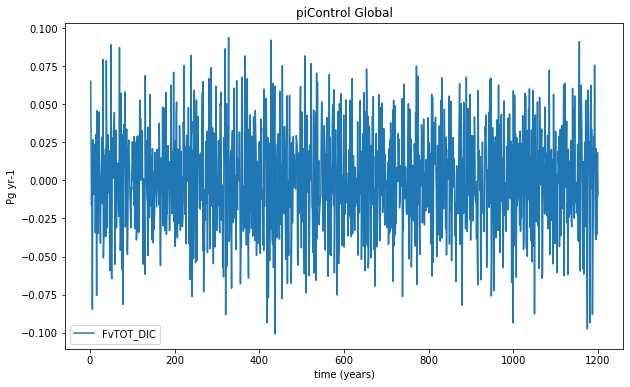

In [4]:
experiment = 'piControl'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     (ensemble: 11)
Coordinates:
    region      <U6 'Global'
Dimensions without coordinates: ensemble
Data variables:
    weight_sum  float64 3.605e+18
    FvTOT_DIC   (ensemble) float32 -0.0024510757 -0.0020705361 ... -0.0018457776
Attributes:
    history:           2020-01-04 15:10:54 UTC: created by esmlab.resample, w...
    title:             b.e21.BHIST.f09_g17.CMIP6-historical.001
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 89644 2018-08-04 14:26:01Z klindsay $
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2018-10-03 at 12:59:45.7
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    in

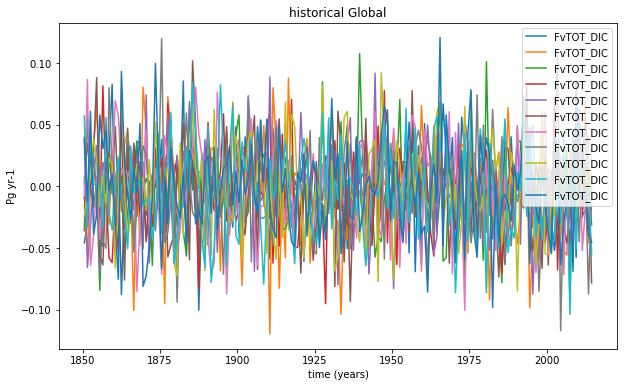

In [5]:
experiment = 'historical'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     (ensemble: 2)
Coordinates:
    region      <U6 'Global'
Dimensions without coordinates: ensemble
Data variables:
    weight_sum  float64 3.605e+18
    FvTOT_DIC   (ensemble) float32 -0.0049717133 -0.0047476133
Attributes:
    history:           2020-01-04 15:14:02 UTC: created by esmlab.resample, w...
    title:             b.e21.BSSP585cmip6.f09_g17.CMIP6-SSP5-8.5.001
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 90507 2019-01-18 20:54:19Z altuntas@ucar...
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2019-03-18 at 16:02:30.6
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    input_file

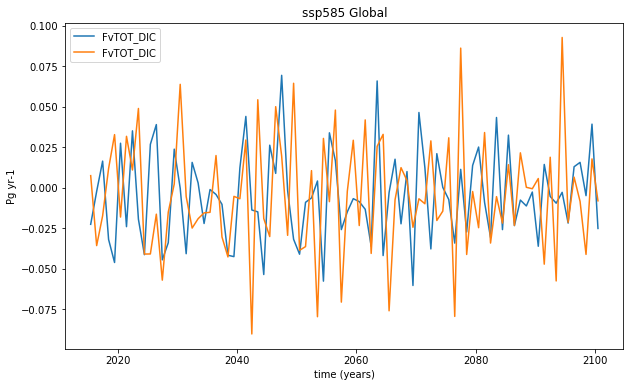

In [6]:
experiment = 'ssp585'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    region      <U6 'Global'
Data variables:
    weight_sum  float64 3.605e+18
    FvTOT_DIC   float32 -0.00021485046
Attributes:
    history:           2020-01-04 15:00:38 UTC: created by esmlab.resample, w...
    title:             b.e21.BW1850.f09_g17.CMIP6-piControl.001
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 89493 2018-07-16 16:11:22Z klindsay $
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2018-07-21 at 17:26:37.3
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    input_file_list:   /glade/campaign/collections/cmip/CMIP6/timeseries-cmip...
FvTOT_DIC_CESM2-WACC

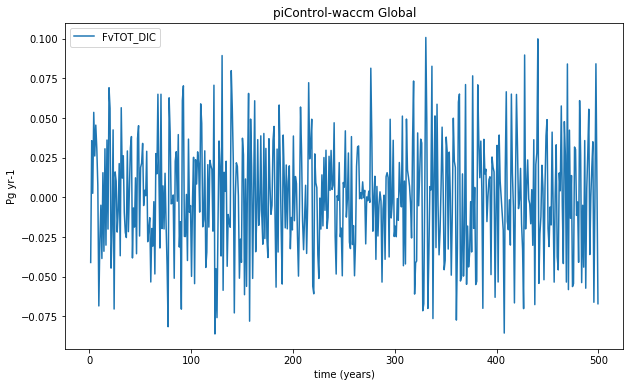

In [7]:
experiment = 'piControl-waccm'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2-WACCM'
experiment= 'piControl'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     (ensemble: 3)
Coordinates:
    region      <U6 'Global'
Dimensions without coordinates: ensemble
Data variables:
    weight_sum  float64 3.605e+18
    FvTOT_DIC   (ensemble) float32 -0.00286242 -0.0026715365 -0.0025539352
Attributes:
    history:           2020-01-04 15:14:40 UTC: created by esmlab.resample, w...
    title:             b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 89644 2018-08-04 14:26:01Z klindsay $
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2018-08-08 at 15:57:13.4
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    in

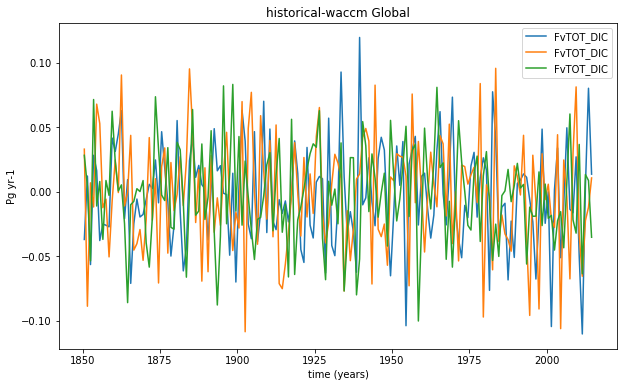

In [8]:
experiment = 'historical-waccm'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2-WACCM'
experiment= 'historical'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    region      <U6 'Global'
Data variables:
    weight_sum  float64 3.605e+18
    FvTOT_DIC   float32 -0.005601149
Attributes:
    history:           2020-01-04 15:15:31 UTC: created by esmlab.resample, w...
    title:             b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.001
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 89644 2018-08-04 14:26:01Z klindsay $
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2018-12-19 at 00:54:00.1
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    input_file_list:   /glade/campaign/collections/cmip/CMIP6/timeseries-cmip...
FvTOT_DIC_

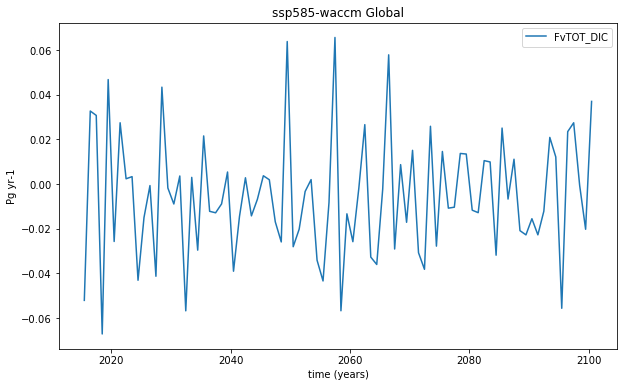

In [9]:
experiment = 'ssp585-waccm'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2-WACCM'
experiment= 'ssp585'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    region      <U6 'Global'
Data variables:
    weight_sum  float64 3.611e+18
    FvTOT_DIC   float32 -0.00032446402
Attributes:
    history:                   2020-01-04 15:16:32 UTC: created by esmlab.res...
    title:                     b40.prescribed_carb.001
    conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 20168 2010-01-05 05:12:53Z njn01 $
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2010-02-18 at 11:0...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    NCO:                       4.0.8
    nco_o

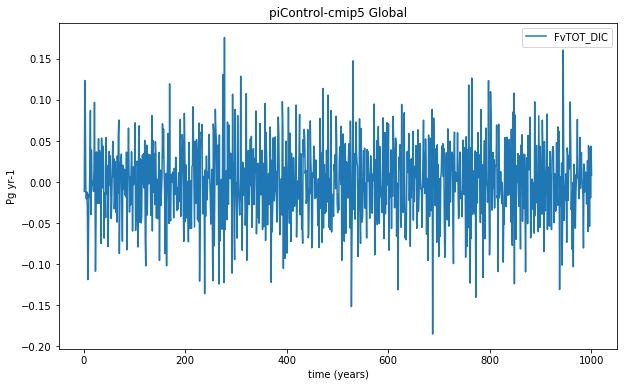

In [10]:
experiment = 'piControl-cmip5'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM1-BGC'
experiment= 'piControl'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    region      <U6 'Global'
Data variables:
    weight_sum  float64 3.611e+18
    FvTOT_DIC   float32 -0.0032121013
Attributes:
    history:                   2020-01-04 15:17:21 UTC: created by esmlab.res...
    title:                     b40.20th.1deg.bdrd.001
    conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 23423 2010-05-28 16:23:16Z njn01 $
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2010-05-31 at 15:1...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    NCO:                       4.0.5
    nco_ope

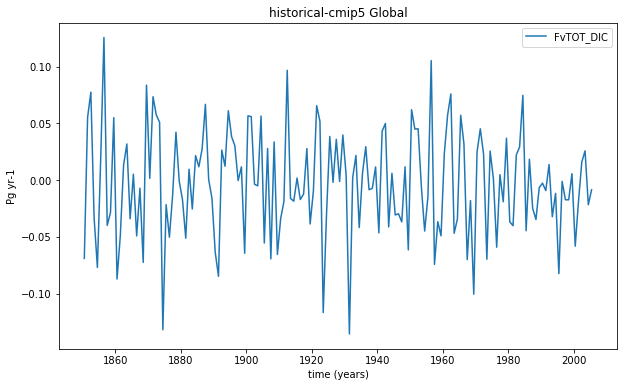

In [11]:
experiment = 'historical-cmip5'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM1-BGC'
experiment= 'historical'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    region      <U6 'Global'
Data variables:
    weight_sum  float64 3.611e+18
    FvTOT_DIC   float32 -0.004582211
Attributes:
    history:                   2020-01-04 15:17:44 UTC: created by esmlab.res...
    title:                     b40.rcp8_5.1deg.bdrd.001
    conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 25034 2010-10-06 22:43:55Z njn01 $
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2011-05-05 at 23:1...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    NCO:                       4.0.5
    nco_op

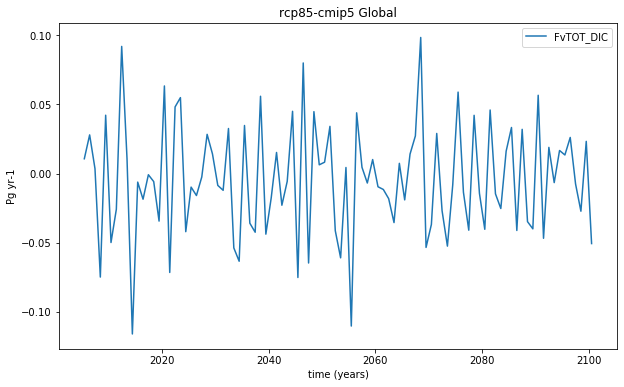

In [12]:
experiment = 'rcp85-cmip5'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM1-BGC'
experiment= 'rcp85'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')